In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
plt.rcParams.update({'font.size':7})
plt.rcParams['figure.figsize'] = [12,8]

In [4]:
train_data = pd.read_csv('Train_Filtered.csv')
model1 = train_data[['data-bathrooms','data-bedroomd','data-propertytype','rating','Transaction type',
                     'carP1','data-price','superArea']]

In [83]:
test_data = pd.read_csv('Test_Filtered.csv')
held_out = train_data[['data-bathrooms','data-bedroomd','data-propertytype','rating','Transaction type',
                     'carP1','data-price','superArea']]
held_out.columns = ['Baths','Rooms','PropType','Rating','TransactionType','Parking','Price','Area']
held_out = held_out[(held_out.Price < 50000000) & (held_out.Price > 2000000)]
held_out = simplify_price(held_out)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (37,58,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
held_out = encode_features(held_out)
held_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14709 entries, 0 to 15168
Data columns (total 9 columns):
Baths              14709 non-null float64
Rooms              14709 non-null int64
PropType           14709 non-null int32
Rating             14709 non-null float64
TransactionType    14709 non-null int32
Parking            14709 non-null int64
Price              14709 non-null int64
Area               14709 non-null int64
PriceLabels        14709 non-null int32
dtypes: float64(2), int32(3), int64(4)
memory usage: 976.8 KB


In [90]:
X_ho = held_out.drop(['PriceLabels', 'Price'], axis=1)
y_ho = held_out['PriceLabels']

X_tr = X_train.append(X_test)
y_tr = y_train.append(y_test)

In [5]:
model1.columns = ['Baths','Rooms','PropType','Rating','TransactionType','Parking','Price','Area']

In [6]:
# model1 = pd.read_csv('Model1Data.csv')
# Filtering out the rows with price more than 5 Cr and less than 20 lakh
model1 = model1[(model1.Price < 50000000) & (model1.Price > 2000000)]


In [4]:
# model1.Price= ((model1.Price.astype('float64')) // 2000000).astype('float64')
# model1.Area = ((model1.Area.astype('float64')) // 100).astype('float64')

In [24]:
model1.describe()

,Baths,Rooms,Rating,Parking,Price,Area
count,14709.000000,14709.000000,14709.000000,14709.000000,1.470900e+04,14709.000000
mean,2.377932,2.481950,4.414889,0.549663,9.398830e+06,1534.377048
std,0.909865,0.849837,0.154640,0.497544,7.840934e+06,871.052524
min,1.000000,1.000000,3.000000,0.000000,2.050000e+06,509.000000
25%,2.000000,2.000000,4.300000,0.000000,5.889000e+06,1178.000000
50%,2.000000,2.000000,4.400000,1.000000,7.618335e+06,1377.000000
75%,3.000000,3.000000,4.500000,1.000000,9.440000e+06,1630.000000
max,11.000000,11.000000,5.000000,1.000000,4.950000e+07,5400.000000


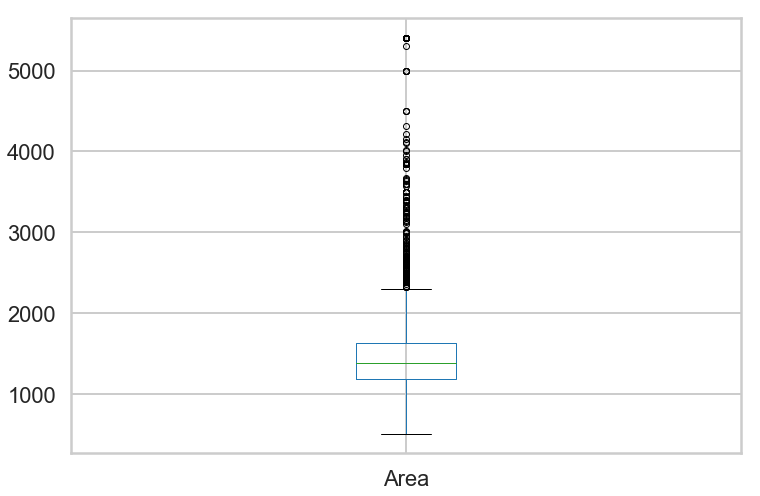

In [18]:
model1.boxplot('Area')

In [7]:
def simplify_area(df):
    bins = (500,800,1100,1400,1700,2000,10000)
    groups = ['Tiny','Small','Sufficient','Spacious','Lavish','Huge']
    categories = pd.cut(df.Area,bins,labels=groups)
    df['AreaLabels'] = categories
    return df

def simplify_rating(df):
    bins = (2.5,3.5,4,4.3,4.6,5.5)
    groups = ['Bad','Okay','Good','VeryGood','Excellent']
    categories = pd.cut(df.Rating,bins,labels=groups)
    df['RatingLabels'] = categories
    return df

def simplify_price(df):
    bins = (1500000,3500000,5000000,6000000,7000000,8000000,9000000,10000000,12000000,15000000,25000000,50000000)
    groups = ['Cheap','LowCost','Budget','Budget2','Economical1','Economical2','Affordable1','Affordable2','Pricy','Premium','UltraPremium']
    categories = pd.cut(df.Price,bins,labels=groups)
    df['PriceLabels'] = categories
    return df

In [8]:
# model1 = simplify_area(model1)
# model1 = simplify_rating(model1)
model1 = simplify_price(model1)

In [33]:
model1.head()

,Baths,Rooms,PropType,Rating,TransactionType,Parking,Price,Area,PriceLabels
0,2.0,2,Multistorey Apartment,4.4,Resale,1,8500000,970,6
1,2.0,3,Multistorey Apartment,4.5,New Property,0,10900000,1530,1
2,2.0,2,Multistorey Apartment,4.3,Resale,1,5800000,1150,2
3,3.0,3,Multistorey Apartment,4.4,Resale,0,6200000,1340,3
4,5.0,4,Multistorey Apartment,4.4,Resale,1,29500000,3600,10


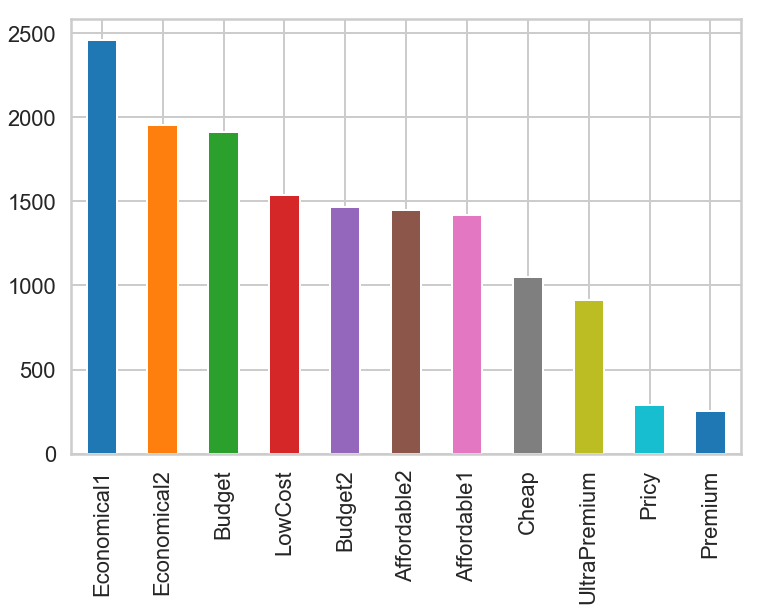

In [10]:
model1.PriceLabels.value_counts().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


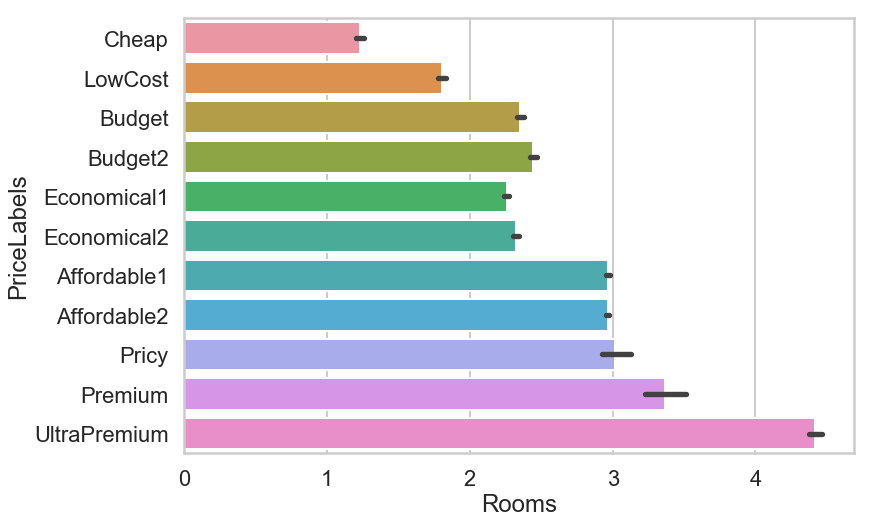

In [23]:
sns.barplot(y="PriceLabels", x="Rooms", data=model1);

In [14]:
df_prop_dummies = pd.get_dummies(model1[['PropType','TransactionType','Parking']], drop_first=True)
from sklearn import preprocessing

def encode_features(df):
    features = ['RatingLabels','PriceLabels','AreaLabels']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

model1 = encode_features(model1)

In [25]:
model1.head()

,Baths,Rooms,PropType,Rating,TransactionType,Parking,Price,Area,AreaLabels,RatingLabels,PriceLabels
0,2.0,2,Multistorey Apartment,4.4,Resale,1,8500000,970,2,4,6
1,2.0,3,Multistorey Apartment,4.5,New Property,0,10900000,1530,3,4,1
2,2.0,2,Multistorey Apartment,4.3,Resale,1,5800000,1150,4,2,2
3,3.0,3,Multistorey Apartment,4.4,Resale,0,6200000,1340,4,4,3
4,5.0,4,Multistorey Apartment,4.4,Resale,1,29500000,3600,0,4,10


In [26]:
lin = pd.concat([model1[['Baths','Rooms','RatingLabels','PriceLabels','AreaLabels']],df_prop_dummies],axis=1)

In [27]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14709 entries, 0 to 15168
Data columns (total 9 columns):
Baths                             14709 non-null float64
Rooms                             14709 non-null int64
RatingLabels                      14709 non-null int32
PriceLabels                       14709 non-null int32
AreaLabels                        14709 non-null int32
Parking                           14709 non-null int64
PropType_Multistorey Apartment    14709 non-null uint8
PropType_Penthouse                14709 non-null uint8
TransactionType_Resale            14709 non-null uint8
dtypes: float64(1), int32(3), int64(2), uint8(3)
memory usage: 1.3 MB


In [13]:
from sklearn.model_selection import train_test_split

X = lin.drop('PriceLabels',axis=1)
y = lin['PriceLabels']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=634)

NameError: name 'lin' is not defined

In [29]:
X.describe()

,Baths,Rooms,RatingLabels,AreaLabels,Parking,PropType_Multistorey Apartment,PropType_Penthouse,TransactionType_Resale
count,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000
mean,2.377932,2.481950,3.382691,2.794887,0.549663,0.963424,0.001428,0.234890
std,0.909865,0.849837,0.944936,1.498621,0.497544,0.187725,0.037759,0.423945
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,3.000000,3.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000
max,11.000000,11.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
len(X_train), len(X_test), len(y_train), len(y_test)

(10296, 4413, 10296, 4413)

In [31]:
y.unique()

array([ 6,  1,  2,  3, 10,  5,  7,  0,  4,  9,  8], dtype=int64)

In [32]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lrm.fit(X_train,y_train)

# Estimated Intercept coefficient
lrm.intercept_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([ 1.22568619, -3.87215255, -0.08005156, -2.51448795,  3.78010933,
       -1.44908536, -2.03432062, 10.2388514 , -2.28988821, -2.02656627,
       -0.97809441])

In [33]:
# The coefficients
#pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lrm.coef_})[['features', 'estimatedCoefficients']]
lrm.coef_

array([[ 1.63604367e-02,  7.84188795e-01, -1.68953179e-01,
        -1.07416086e+00,  5.03186160e-01,  1.44140684e+00,
        -1.23444429e-01, -7.03127934e-01],
       [ 7.72764905e-01,  9.78430094e-01,  8.38392729e-01,
        -1.25755711e-01, -6.49170543e-01, -2.64252114e-01,
        -2.12985980e-01, -9.55623516e-01],
       [ 5.35006724e-01, -8.52145216e-01,  6.40120346e-01,
         7.97392599e-01,  6.07509400e-02, -2.77111471e-01,
        -4.94372147e-02, -2.87263007e-01],
       [ 1.22889945e+00, -5.95062694e-01, -9.12253581e-02,
         1.23797928e+00,  1.63407221e+00, -2.37773924e-01,
        -2.23522516e-02, -5.69185934e-02],
       [-3.39874471e+00, -2.16018779e+00, -2.66356048e-01,
         1.76799967e+00,  2.47899186e+00,  1.48271938e+00,
        -1.15605939e-03,  2.15159245e+00],
       [ 1.32462417e+00, -1.11301592e+00,  2.30192717e-01,
         1.38547333e+00,  2.32078341e-01, -2.10926945e-01,
        -6.34458703e-02, -9.87237478e-01],
       [ 1.64201957e-01,  5.022635

In [34]:
# Verifying the prediction prices
lrm.predict(X_test)[:5]

array([ 6,  5,  5, 10,  6])

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(lrm.predict(X_test), y_test))

0.5216406072966236


In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x.values[train], y.values[train]) # fit
        result += score_func(clf.predict(x.values[test]), y.values[test]) # evaluate score function on held-out data
    return result / nfold # average

In [22]:
KFold(5).split(X)

<generator object _BaseKFold.split at 0x000000F56E970480>

In [23]:
# X = X.reset_index()
# y = y.reset_index()
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=200)
score = cv_score(clf, X, y)
print(score)

0.5180710382718035


In [75]:
Cs = [0.001,0.01,0.1,1,10,100,1000]

In [25]:
scores = []
for c in Cs:
    clf = LogisticRegression(C=c,solver='lbfgs', multi_class='multinomial', max_iter=2000)
    scores.append((cv_score(clf,X,y),c))

m = max(scores, key=lambda x:x[0])

In [26]:
m

(0.5184380107488676, 0.1)

In [76]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=2000)
params = {'C' : Cs}
gridObj = GridSearchCV(clf,params,scoring=cv_score)

In [78]:
gridObj.fit(X_train,y_train)
best = gridObj.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packag

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packag

In [82]:
gridObj.best_params_

{'C': 1000}

In [81]:
f_lb = f1_score(y_test, best.predict(X_test), average='weighted')
f_lb

0.5804481809947446

In [29]:
best.fit(X_train,y_train)
print(accuracy_score(best.predict(X_test),y_test))

0.5204511482538389


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_fitted = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
X_fitted

numpy.ndarray

In [74]:
scaled_features = scaler.fit_transform(X.values, 4)
X_fitted = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [75]:
Cs = [0.001,0.01,0.1,1,10,100,1000]

scores = []
for c in Cs:
    clf = LogisticRegression(C=c,solver='lbfgs', multi_class='multinomial')
    scores.append((cv_score(clf,X_fitted,y),c))

m = max(scores, key=lambda x:x[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [76]:
m

(0.6161248391264437, 0.1)

In [164]:
from sklearn.model_selection import KFold

def run_kfold(clf):
    kf = KFold(random_state=891, n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 1 accuracy: 0.7688544639217285


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 2 accuracy: 0.7692621280065226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 3 accuracy: 0.7696697920913168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 4 accuracy: 0.7688544639217285


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 5 accuracy: 0.7692621280065226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 6 accuracy: 0.4048104362005707


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 7 accuracy: 0.4288626172034244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 8 accuracy: 0.25244698205546495


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 9 accuracy: 0.46288743882544864
Fold 10 accuracy: 0.7406199021207178
Mean Accuracy: 0.6135530352353445


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [27]:
! pip install xgboost

In [21]:
for m in (model1.PriceLabels.unique()):
    print(m)

Economical2
Affordable2
Budget
Budget2
UltraPremium
nan
Economical1
LowCost
Affordable1
Cheap
Pricy
Premium


In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
from sklearn import preprocessing

def encode_features(df):
#     features = ['RatingLabels','PriceLabels','AreaLabels','PropType','TransactionType']
    features = ['PriceLabels','PropType','TransactionType']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

model1 = encode_features(model1)

In [10]:
model2 = model1.drop(['Price'],axis=1)
model2.reset_index(drop='index', inplace=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(model2.drop('PriceLabels',axis=1), model2['PriceLabels'], 
                                                    test_size=.3, random_state=42)

In [38]:
model2.describe()

,Baths,Rooms,PropType,Rating,TransactionType,Parking,Area,PriceLabels
count,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000,14709.000000
mean,2.377932,2.481950,0.966279,4.414889,0.234890,0.549663,1534.377048,4.246516
std,0.909865,0.849837,0.188259,0.154640,0.423945,0.497544,871.052524,2.762837
min,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,509.000000,0.000000
25%,2.000000,2.000000,1.000000,4.300000,0.000000,0.000000,1178.000000,2.000000
50%,2.000000,2.000000,1.000000,4.400000,0.000000,1.000000,1377.000000,5.000000
75%,3.000000,3.000000,1.000000,4.500000,0.000000,1.000000,1630.000000,6.000000
max,11.000000,11.000000,2.000000,5.000000,1.000000,1.000000,5400.000000,10.000000


In [39]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [40]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [41]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.56%


In [42]:
from sklearn.metrics import auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

lb = LabelBinarizer()
lb.fit(y_test)
y_test_lb = lb.transform(y_test)
y_pred_lb = lb.transform(y_pred)

print(roc_auc_score(y_test_lb, y_pred_lb, average='macro'))

0.8495348211424504


In [43]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [134]:
xgb_param_grid = {'base_score': 0.5,
                  'booster': 'gbtree',
                  'colsample_bylevel': 1,
                  'colsample_bynode': 1,
                  'colsample_bytree': 1,
                  'gamma': 0,
                  'learning_rate': 0.1,
                  'max_delta_step': 0,
                  'max_depth': 3,
                  'min_child_weight': 1,
                  'missing': None,
                  'n_estimators': 100,
                  'nthread': 1,
                  'objective': 'multi:softmax',
                  'reg_alpha': 0,
                  'reg_lambda': 1,
                  'scale_pos_weight': 1,
                  'seed': 0,
                  'subsample': 1,
                  'verbosity': 1}

In [44]:
from xgboost import DMatrix, cv
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def modelFit(xgb_cws, data, useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
    X_train, y_train= data
    if useTrainCV:
        xgb_xparams = xgb_cws.get_xgb_params()
        xgb_xparams['num_class'] = len(y_train.unique())
        xgb_train = DMatrix(X_train.values, label=y_train, missing=0, weight=class_weights)

        cvresult = cv(xgb_xparams, xgb_train, num_boost_round=xgb_cws.get_params()['n_estimators'], nfold=cv_folds, 
                      stratified=True, metrics='merror', early_stopping_rounds=early_stopping_rounds, show_stdv=True)

        xgb_cws.set_params(n_estimators=cvresult.shape[0])
        
    xgb_cws.fit(X_train, y_train, eval_metric='auc')
    
    preds = xgb_cws.predict(X_train)
    
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train.values, preds))
    
    lb = LabelBinarizer()
    lb.fit(y_train)
    y_test_lb = lb.transform(y_train)
    y_pred_lb = lb.transform(preds)

    print("AUC Score (Train): %f" % roc_auc_score(y_test_lb, y_pred_lb))

    feat_imp = pd.Series(xgb_cws.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [45]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def scoring_function(estimator, X, y):
    preds = estimator.predict(X)
    lb = LabelBinarizer()
    lb.fit(y)
    y_test_lb = lb.transform(y)
    y_pred_lb = lb.transform(preds)
    
    return roc_auc_score(y_test_lb, y_pred_lb)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
Accuracy : 0.8129
AUC Score (Train): 0.869305


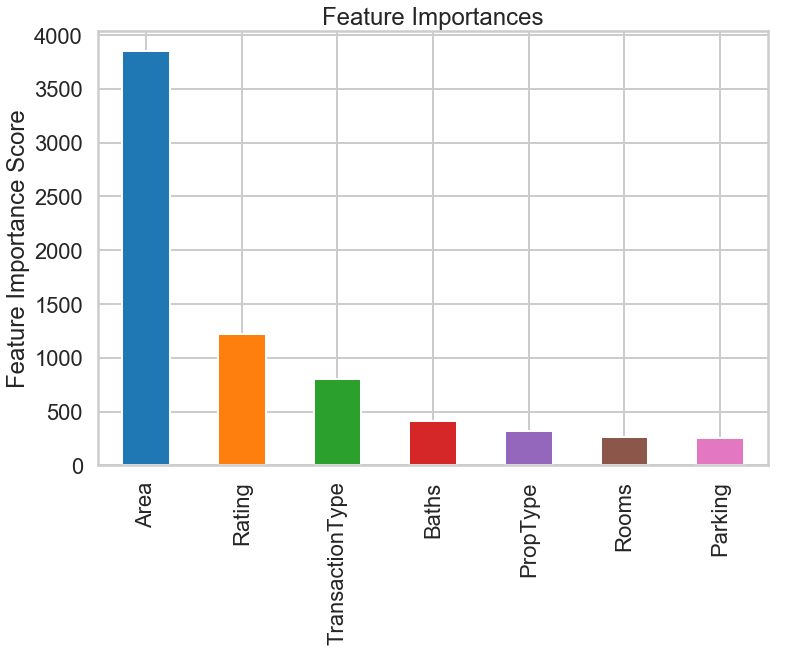

In [64]:
xgb_cws = XGBClassifier(objective='multi:softmax',n_estimators=100)
modelFit(xgb_cws, (X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
Accuracy : 0.8498
AUC Score (Train): 0.901081


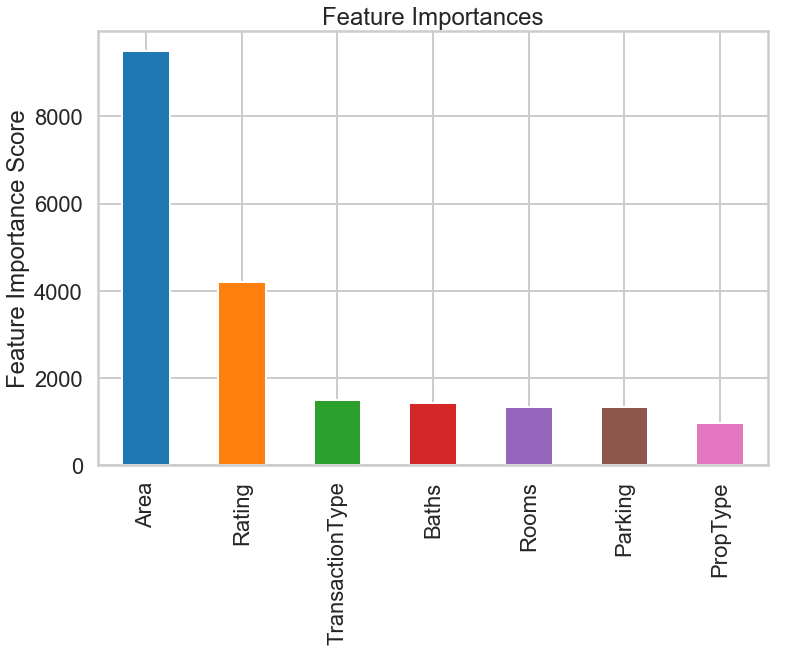

In [65]:
xgb_cws = XGBClassifier(objective='multi:softmax',n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=0.8)
modelFit(xgb_cws, (X_train, y_train))

In [67]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [69]:
def get_metrics(xgb_cws, X, y):
    preds = xgb_cws.predict(X)
    acc = accuracy_score(y.values, preds)
    sco = scoring_function(xgb_cws, X, y)
    return (acc, sco)

def get_xgb_class():
    return XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=5, 
                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                  objective= 'multi:softmax', nthread=4, seed=27)

In [68]:
get_metrics(xgb_cws, X, y)

(0.8318716432116391, 0.8864159983660685)

In [70]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = get_xgb_class(), param_grid = param_test1, scoring=scoring_function,
                        n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 3}, 0.850429970050919)

In [73]:
from sklearn.model_selection import GridSearchCV

d = gsearch1.best_params_['max_depth']
mcw = gsearch1.best_params_['min_child_weight']

param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=d,
 min_child_weight=mcw, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, seed=27), 
 param_grid = param_test2, scoring=scoring_function, n_jobs=4, iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.3}, 0.8525140932658498)

In [74]:
g = gsearch2.best_params_['gamma']

param_test3 = {
     'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=d,
 min_child_weight=mcw, gamma=g, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, seed=27), 
 param_grid = param_test3, scoring=scoring_function,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.8525140932658498)

In [75]:
ss = gsearch3.best_params_['subsample']
csb = gsearch3.best_params_['colsample_bytree']

param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=d,
 min_child_weight=mcw, gamma=g, subsample=ss, colsample_bytree=csb,
 objective= 'multi:softmax', nthread=4, seed=27), 
 param_grid = param_test4, scoring=scoring_function,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 1e-05}, 0.8525140932658498)

In [27]:
def f_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return f1_score(y, y_pred, average='weighted')

In [28]:
from sklearn.model_selection import GridSearchCV

param_test5 = {
 'max_depth':[6, 7, 8],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, seed=27), 
 param_grid = param_test5, scoring=f_scorer,n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.6,
  'gamma': 0.3,
  'max_depth': 6,
  'reg_alpha': 1,
  'subsample': 0.9},
 0.795384831666108)

In [76]:
print(get_metrics(gsearch1.best_estimator_, X, y))
print(get_metrics(gsearch2.best_estimator_, X, y))
print(get_metrics(gsearch3.best_estimator_, X, y))
print(get_metrics(gsearch4.best_estimator_, X, y))

(0.8236453871779182, 0.8779903126290901)
(0.823237473655585, 0.8778402519921857)
(0.823237473655585, 0.8778402519921857)
(0.823237473655585, 0.8778402519921857)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
Accuracy : 0.8298
AUC Score (Train): 0.884066


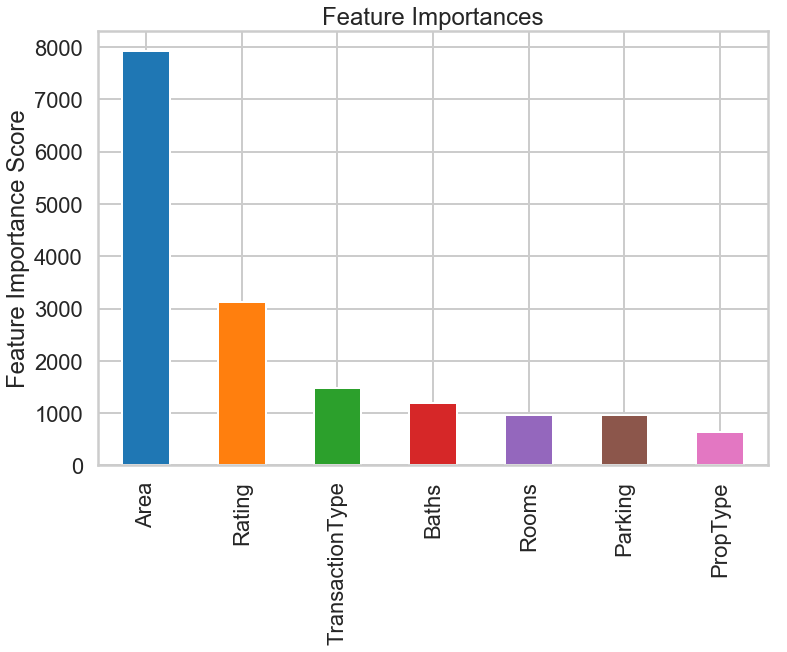

In [83]:
modelFit(bestfit, (X, y))

(0.823237473655585, 0.8778402519921857)


Text(0, 0.5, 'Feature Importance Score')

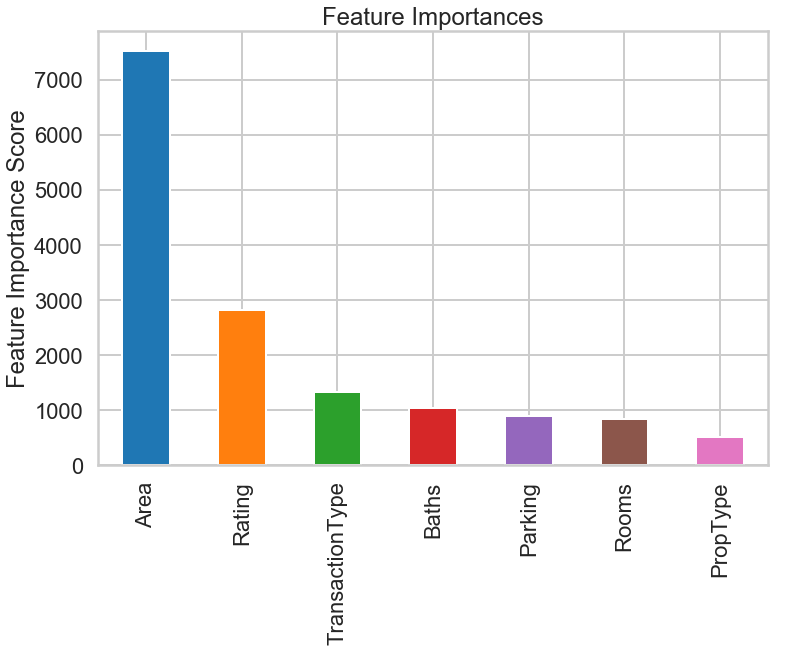

In [81]:
bestfit = gsearch4.best_estimator_ 

print(get_metrics(bestfit, X, y))

feat_imp = pd.Series(bestfit.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.627
AUC Score (Train): 0.785876


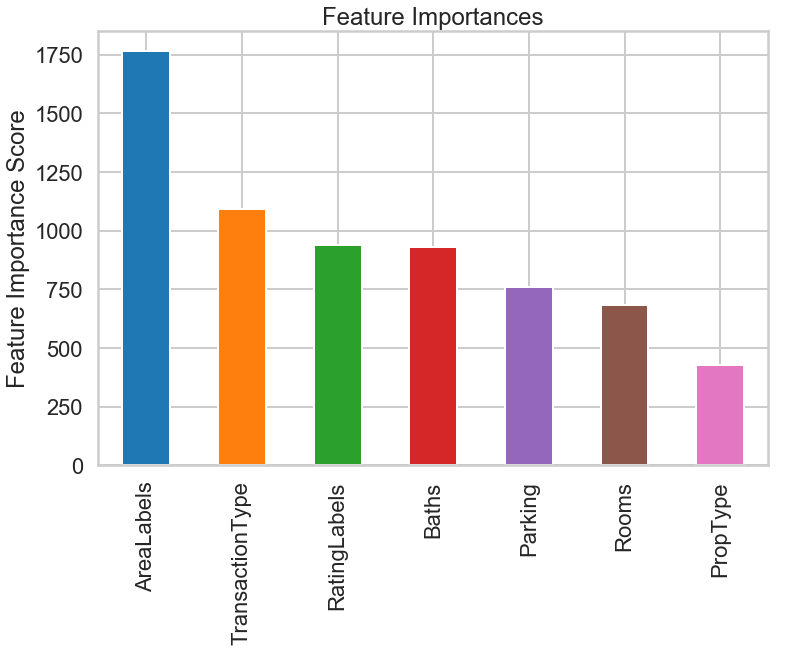

In [150]:
modelFit(xgb_cws, (X_test, y_test), useTrainCV=False)

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, 
                               random_state=25, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 42.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [15]:
from sklearn.metrics import f1_score

best = rf_random.best_estimator_
best.fit(X_train, y_train)
y_pred = best.predict(X_test)
f_score = f1_score(y_test, y_pred, average='weighted')
f_score

0.7910840929270856

In [17]:
# f_samples = f1_score(y_test, y_pred, average='samples')
f_macro = f1_score(y_test, y_pred, average='macro')
f_macro

0.720233223111082

In [ ]:
from xgboost import XGBClassifier

In [38]:
paramset = {'colsample_bytree': 0.6,
  'gamma': 0.3,
  'max_depth': 6,
  'reg_alpha': 1,
  'subsample': 0.9}
x_best = XGBClassifier(objective='multi:softmax',n_estimators=100, max_depth=6, min_child_weight=2, gamma=0.3, subsample=0.3, 
                       colsample_bytree=0.6, reg_alpha=1)
x_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.3, verbosity=1)

In [39]:
y_pred_xg = x_best.predict(X_test)

In [40]:
f_score = f1_score(y_test, y_pred_xg, average='weighted')
f_score

0.7896247466284633

Text(0, 0.5, 'Feature Importance Score')

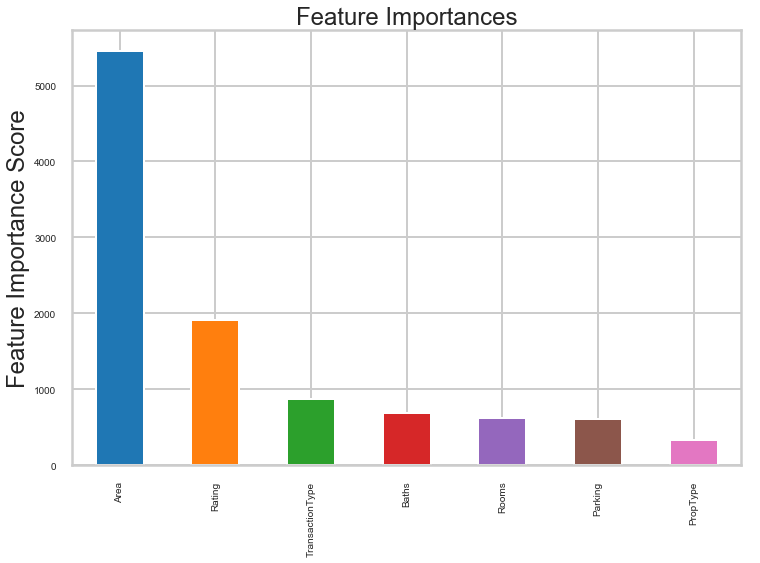

In [69]:
feat_imp = pd.Series(x_best.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=[12,8], fontsize=10)
plt.ylabel('Feature Importance Score')

In [47]:
d_rcf = RandomForestClassifier()
d_rcf.fit(X_train, y_train)
y_pred_rd = d_rcf.predict(X_test)
f_rc = f1_score(y_test, y_pred_rd, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
f_rc

0.7722099068577131

In [70]:
from sklearn.linear_model import LogisticRegression

lr_rcf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr_rcf.fit(X_train, y_train)
y_pred_lrd = lr_rcf.predict(X_test)
f_lrc = f1_score(y_test, y_pred_lrd, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
f_lrc

0.4991494434346961

In [72]:
accuracy_score(y_test, y_pred_rd), accuracy_score(y_test, y_pred_lrd)

(0.7713573532744165, 0.5175617493768412)

Making the base models train on the whole datasets.

In [87]:
# XGB Best params
paramset = {'colsample_bytree': 0.6,
  'gamma': 0.3,
  'max_depth': 6,
  'reg_alpha': 1,
  'subsample': 0.9}

# Logistic Best params
Cs = 1000

In [92]:
# Best logistic
y_lpr_ho = best.predict(X_ho)
y_f_lho = f1_score(y_ho, y_lpr_ho, average='weighted')

In [95]:
# Best XGB
y_xpr_ho = x_best.predict(X_ho)
y_f_xho = f1_score(y_ho, y_xpr_ho, average='weighted')

In [96]:
y_f_lho, y_f_xho

(0.5830405590675167, 0.8118008509663931)